In [1]:
# In this example, you'll be creating a Python script to visualize the weather of 500+ cities 
# across the world of varying distance from the equator. To accomplish this, you'll be utilizing 
# a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative 
# model of weather across world cities.

# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# Import API key
from config import api_key

In [2]:
# Generate Cities List – Output File (CSV) –
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [3]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

# Placeholder for API Calls
lat = []
lng = []
temp = []
humid = []
wind = []
cloud = []

# Get the variables
for x in range(len(cities)):
    response = requests.get(f"{query_url}{cities[x]}").json()
    
    # To avoid stopping the request because of NaN or add a zero instead:
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        wind.append(response["wind"]["speed"])
        cloud.append(response["clouds"]["all"])
    except KeyError:
        lat.append(np.nan)
        lng.append(np.nan)
        temp.append(np.nan)
        humid.append(np.nan)
        wind.append(np.nan)
        cloud.append(0)
    
    # Include a print log of each city as it is being processed 
    #(with the city number and city name).      
    print(f"Getting record {x + 1} | {cities[x]}")
    
print("----------------------------")
print("Finally! Data Retrieval is Complete")
print("----------------------------")

Getting record 1 | sokolo
Getting record 2 | busselton
Getting record 3 | saint-philippe
Getting record 4 | belmonte
Getting record 5 | taltal
Getting record 6 | ziro
Getting record 7 | mananara
Getting record 8 | wagar
Getting record 9 | tual
Getting record 10 | mar del plata
Getting record 11 | paita
Getting record 12 | ushuaia
Getting record 13 | pushkinskiye gory
Getting record 14 | araouane
Getting record 15 | atuona
Getting record 16 | tunxi
Getting record 17 | tuktoyaktuk
Getting record 18 | bathsheba
Getting record 19 | diamantino
Getting record 20 | chokurdakh
Getting record 21 | mataura
Getting record 22 | wooster
Getting record 23 | saint-pierre
Getting record 24 | kitgum
Getting record 25 | samusu
Getting record 26 | airai
Getting record 27 | lata
Getting record 28 | ribeira grande
Getting record 29 | vaini
Getting record 30 | thompson
Getting record 31 | kaitangata
Getting record 32 | port hawkesbury
Getting record 33 | albany
Getting record 34 | rikitea
Getting record 35 

Getting record 274 | gorlev
Getting record 275 | luderitz
Getting record 276 | gizo
Getting record 277 | mount gambier
Getting record 278 | longlac
Getting record 279 | caracuaro
Getting record 280 | leningradskiy
Getting record 281 | tarudant
Getting record 282 | plastun
Getting record 283 | mandalgovi
Getting record 284 | atoka
Getting record 285 | chagda
Getting record 286 | turukhansk
Getting record 287 | prado
Getting record 288 | oytal
Getting record 289 | boras
Getting record 290 | lubbock
Getting record 291 | bom jesus
Getting record 292 | nome
Getting record 293 | dakar
Getting record 294 | miraflores
Getting record 295 | belaya gora
Getting record 296 | flinders
Getting record 297 | ilulissat
Getting record 298 | lively
Getting record 299 | isangel
Getting record 300 | carnarvon
Getting record 301 | nueve de julio
Getting record 302 | bana
Getting record 303 | shingu
Getting record 304 | gladstone
Getting record 305 | alghero
Getting record 306 | usakos
Getting record 307 | m

Getting record 546 | vanavara
Getting record 547 | requena
Getting record 548 | paidha
Getting record 549 | kawana waters
Getting record 550 | sidi ali
Getting record 551 | moindou
Getting record 552 | quelimane
Getting record 553 | trojes
Getting record 554 | saryozek
Getting record 555 | havelock
Getting record 556 | high rock
Getting record 557 | sambava
Getting record 558 | brewer
Getting record 559 | samarai
Getting record 560 | tondano
Getting record 561 | albury
Getting record 562 | barawe
Getting record 563 | yubari
Getting record 564 | bambanglipuro
Getting record 565 | el angel
Getting record 566 | urengoy
Getting record 567 | tuzha
Getting record 568 | kyshtovka
Getting record 569 | howard springs
Getting record 570 | itacare
Getting record 571 | saint-georges
Getting record 572 | agva
Getting record 573 | verkhnevilyuysk
Getting record 574 | letlhakeng
Getting record 575 | road town
Getting record 576 | kaa-khem
Getting record 577 | ulaanbaatar
Getting record 578 | egvekino

In [5]:
# Convert Raw Data to DataFrame
cities_df = pd.DataFrame({"City": cities, "Latitude": lat, "Longitude": lng, 
                          "Temperature": temp, "Humidity": humid, "Wind Speed": wind, 
                          "Cloudiness": cloud})

# Drop any NA Value
cities_df=cities_df.dropna(how="any") 

# How many cities do we have? Answer 562
n_cities=len(cities_df)
#n_cities

In [6]:
# Export the city data into a .csv.
cities_df.to_csv("cities_df.csv", index=False, header=True)

# Display the DataFrame
cities_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,sokolo,14.73,-6.12,23.55,9.0,4.64,100
1,busselton,-33.65,115.33,22.22,62.0,0.89,0
2,saint-philippe,-21.36,55.77,22.00,64.0,3.60,20
3,belmonte,-15.86,-38.88,26.00,88.0,3.10,20
4,taltal,-25.40,-70.48,19.21,83.0,1.92,0


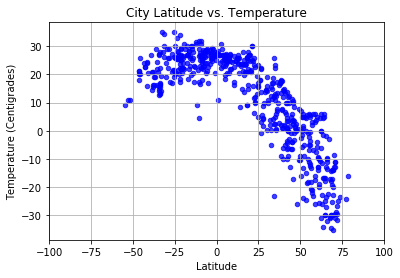

In [9]:
# Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

# Latitude vs. Temperature Plot
plt.scatter(x = cities_df["Latitude"], y = cities_df["Temperature"], marker="o",
             alpha=0.75, edgecolors = "blue", facecolor = "blue", s=20)

plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Centigrades)")
plt.xlim(-100,100)
plt.grid()

# Save the plotted figures as .pngs.
plt.savefig("latitude_vs_temperature.png")
plt.show()

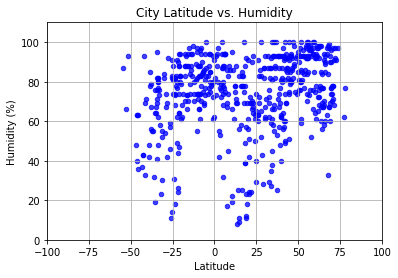

In [12]:
# Latitude vs. Humidity Plot
plt.scatter(x = cities_df["Latitude"], y = cities_df["Humidity"], marker="o",
             alpha=0.75, edgecolors = "blue", facecolor = "blue", s=20)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-100,100)
plt.ylim(0,110)
plt.grid()

# Save the plotted figures as .pngs.
plt.savefig("latitude_vs_humidity.png")
plt.show()

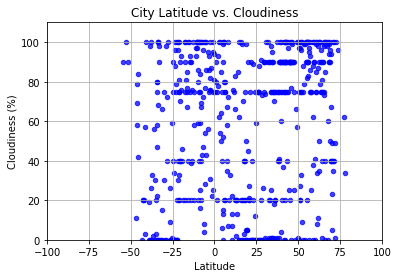

In [13]:
# Latitude vs. Cloudiness Plot
plt.scatter(x = cities_df["Latitude"], y = cities_df["Cloudiness"], marker="o",
             alpha=0.75, edgecolors = "blue", facecolor = "blue", s=20)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-100,100)
plt.ylim(0,110)
plt.grid()

# Save the plotted figures as .pngs.
plt.savefig("latitude_vs_cloudiness.png")
plt.show()

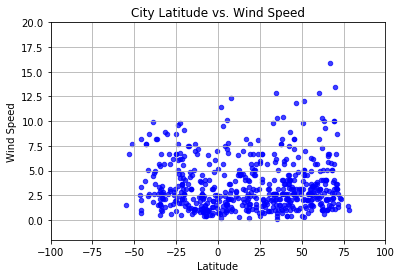

In [18]:
# Latitude vs. Wind Speed Plot
plt.scatter(x = cities_df["Latitude"], y = cities_df["Wind Speed"], marker="o",
             alpha=0.75, edgecolors = "blue", facecolor = "blue", s=20)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(-100,100)
plt.ylim(-2,20)
plt.grid()

# Save the plotted figures as .pngs.
plt.savefig("latitude_vs_wind_speed.png")
plt.show()

In [ ]:
# Linear Regression
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

In [ ]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression